 МЕТОД ОПОРНЫХ ВЕКТОРОВ
Метод опорных векторов (support vector machines, SVMs) — очень мощный и гибкий класс алгоритмов обучения с учителем как для классификации, так 
и регрессии. Рассмотрим как использовать метод опорных векторов в задачах классификации. 

In [84]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
 # Воспользуемся настройками по умолчанию библиотеки Seaborn
import seaborn as sns
sns.set()

Рассмотрим применение метода опорных векторов в задачах классификации. 

Тренировка линейного классификатора 

In [85]:
# Загрузить библиотеки
from sklearn import datasets
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC

# Загрузить данные всего с двумя классами и двумя признаками 
iris = datasets.load_iris()
features = iris.data[:300,:2] 
target = iris.target[:300]
# Стнадартизировать признаки 
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Создать опорно-векторный классификатор 
svc = LinearSVC(C=1.0)
# Натренировать модель
model = svc.fit(features_standardized, target)

Визуализация полученных результатов

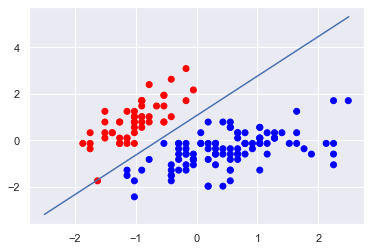

In [86]:
# Загрузить библиотеку
from matplotlib import pyplot as pit


# Вывести точки данных на график и расцветить, используя их класс 
color = ["red" if C == 0 else "blue" for C in target] 
pit.scatter(features_standardized[:,0], features_standardized[:,1], c=color)

# Создать гиперплоскость 
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx-(svc.intercept_[0]) / w[1]

# Начертить гиперплоскость 
pit.plot(xx, yy)
pit. show ()

SVM-ядро
Возможности метода SVM расширяются при его комбинации с ядрами (kernels). 

Требуется натренировать опорно-векторный классификатор, но ваши классы линейно неразделимы.

In [58]:
# Загрузить библиотеки 
from sklearn.svm import SVC 
from sklearn import datasets
from sklearn.preprocessing import StandardScaler 
import numpy as np
# Задать начальное значение рандомизации 
np.random.seed(0)
# Сгенерировать два признака 
features = np.random.randn(200, 2)
# Cгенерируем линейно разделимые классы
target_xor = np.logical_xor(features[:, 0] > 0 , features[:, 1] > 0 ) 
target = np.where(target_xor, 0, 1)

# Создать опорно-векторную машину  с радиально-базисным функциональным ядром (RBF-ядром) 
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
# Натренировать классификатор 
model = svc.fit(features, target)

Будем использовать функцию, которая выводит на график наблюдения и гиперплоскость границы решения двумерного пространства.

In [67]:
# Выведем на график наблюдения и гиперплоскость границы решения 
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as pit

def plot_decision_regions(X, y, classifier): 
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    for idx, cl in enumerate(np.unique(y)): 
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), label=cl)


Рассмотрим данные, содержащие два признака (т. е. две размерности) и вектор целей с классом каждого наблюдения. 
Учтем, что классы назначены так, что они линейно неразделимы. То есть нет прямой линии, которую мы могли бы провести, чтобы разделить два класса. 

Создадим классификатор опорно-векторной машины с линейным ядром:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


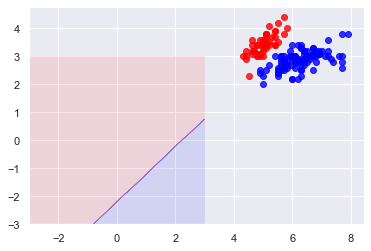

In [87]:
# Создать опорно-векторный классификатор с линейным ядром 
svc_linear = SVC(kernel="linear", random_state=0, C=1)
# Натренируем модель 
svc_linear.fit(features, target)
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear', max_iter=-1, probability=False, random_state=0, shrinking=True, 
tol=0.001, verbose=False)

plot_decision_regions(features, target, classifier=svc_linear) 
pit.show()


Видно, линейная гиперплоскость очень плохо справилась с разделением двух классов
 Теперь давайте вместо линейного ядра подставим радиальнобазисное функциональное ядро и используем его для того, чтобы натренировать
новую модель

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


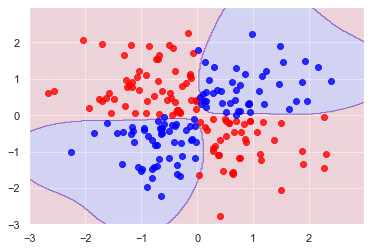

In [69]:
# Создать опорно-векторную машину с радиально-базисным функциональным ядром (RBF-ядром) 
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
# Натренировать классификатор 
model = svc.fit(features, target)

# Вывести на график наблюдения и гиперплоскость 
plot_decision_regions(features, target, classifier=svc) 
pit. show ()


Применив радиально-базисное функциональное ядро, мы смогли создать границу решения, способную справиться с разделением двух классов гораздо лучше, чем линейное ядро. 

!!!!!!Нужна теория из лекций

В библиотеке scikit-leam можно выбрать требуемое ядро с помощью параметра kernel. После того как мы выберем ядро, нам нужно указать соответствующие параметры ядра, такие как значение d (используя параметр степени degree) в полиномиальных ядрах и гамма (используя параметр gamma) в радиально-базисных функциональных ядрах. Нам также нужно задать штрафной параметр С. Во время тренировки модели в большинстве случаев все они должны рассматриваться как гиперпараметры, при этом, чтобы определить комбинацию их значений, которая производит
модель с наилучшей результативностью, мы должны использовать методы отбора модели

РАЗМЫТИЕ ОТСТУПОВ
До сих пор мы рассматривали хорошо очищенных наборов данных, в которых существует идеальная граница решений. 
Что делать, если данные в некоторой степени перекрываются? 


На этот случай в реализации метода SVM есть небольшой поправочный параметр для «размытия» отступа. Данный параметр разрешает некоторым точкам «заходить» на отступ в тех случаях, когда это приводит к лучшей аппроксимации. 
Степень размытости отступа библиотеке scikit-lean контролируется с помощью гиперпараметра С — штрафа, налагаемого на ошибки. 
С — это параметр ученика SVC и штраф за ошибочное классифицирование точки данных. Когда значение С мало, классификатор получает одобрение на ошибочно классифицированные точки данных (высокое смещение, но низкую дисперсию). Когда значение С большое, классификатор сильно штрафуется за ошибочно классифицированные данные и поэтому отклоняется назад, чтобы избежать любых ошибочно классифицированных точек данных (низкое смещение, но высокая дисперсия).

Рассмотрим влияние изменения параметра C на итоговую аппроксимацию посредством размытия отступа

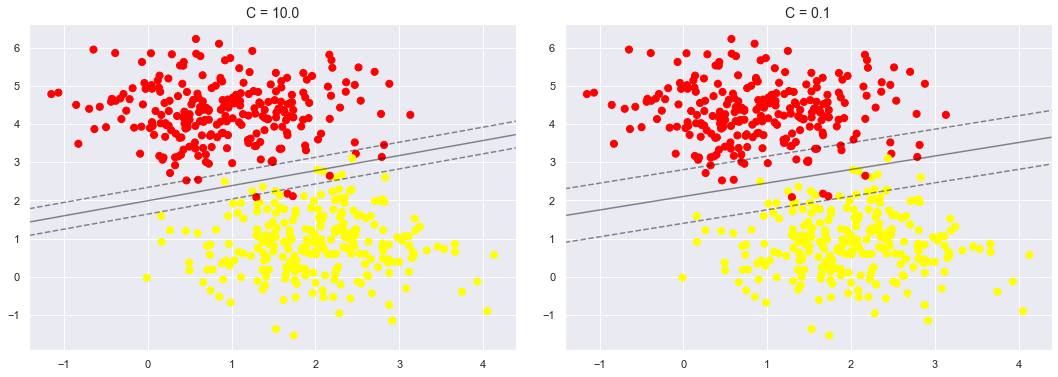

In [79]:
X, y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C), size=14)



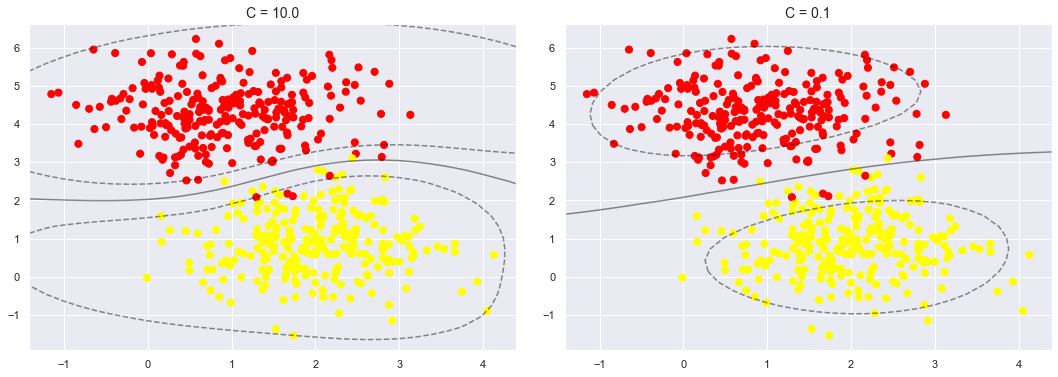

In [82]:
X, y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='rbf', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C), size=14)    
